In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [86]:
dl_predictions = pd.read_csv('C:/Users/mayer/PycharmProjects/sexism_detection/data_submission/dl_predictions.csv')
logistic_TFIDF_predictions = pd.read_csv('C:/Users/mayer/PycharmProjects/sexism_detection/data_submission/logistic_TFIDF_predictions.csv')
logistic_w2v_predictions = pd.read_csv('C:/Users/mayer/PycharmProjects/sexism_detection/data_submission/logistic_w2v_predictions.csv')
svm_TFIDF_predictions = pd.read_csv('C:/Users/mayer/PycharmProjects/sexism_detection/data_submission/svm_TFIDF_predictions.csv')

In [87]:
print(dl_predictions.head())

   Unnamed: 0  label  y_pred    prob_0    prob_1   logit_0   logit_1
0           0      0       0  0.996087  0.003913  2.540978 -2.998505
1           1      1       1  0.030102  0.969898 -1.877300  1.595283
2           2      0       0  0.996104  0.003896  2.543153 -3.000632
3           3      1       1  0.017916  0.982084 -2.182345  1.821633
4           4      1       1  0.017843  0.982157 -2.184655  1.823493


In [88]:
print(logistic_TFIDF_predictions.head())

   y_true  y_pred    prob_0    prob_1  logit_0  logit_1  label
0       0       0  0.866904  0.133096      NaN      NaN      0
1       1       0  0.586243  0.413757      NaN      NaN      0
2       0       0  0.981946  0.018054      NaN      NaN      0
3       1       1  0.110923  0.889077      NaN      NaN      1
4       1       1  0.087772  0.912228      NaN      NaN      1


In [89]:
print(logistic_w2v_predictions.head())

   y_true  y_pred    prob_0    prob_1  logit_0  logit_1  label
0       0       1  0.362843  0.637157      NaN      NaN      0
1       1       1  0.393677  0.606323      NaN      NaN      0
2       0       0  0.699683  0.300317      NaN      NaN      0
3       1       1  0.344796  0.655204      NaN      NaN      1
4       1       1  0.452562  0.547438      NaN      NaN      1


In [90]:
print(svm_TFIDF_predictions.head())

   y_true  y_pred    prob_0    prob_1  logit_0  logit_1  label
0       0       0  0.974648  0.025352      NaN      NaN      0
1       1       0  0.876454  0.123546      NaN      NaN      0
2       0       0  0.996901  0.003099      NaN      NaN      0
3       1       1  0.051777  0.948223      NaN      NaN      1
4       1       1  0.032190  0.967810      NaN      NaN      1


In [91]:
dl_predictions = dl_predictions.drop(dl_predictions.columns[0], axis=1)

In [92]:
print(dl_predictions.head())

   label  y_pred    prob_0    prob_1   logit_0   logit_1
0      0       0  0.996087  0.003913  2.540978 -2.998505
1      1       1  0.030102  0.969898 -1.877300  1.595283
2      0       0  0.996104  0.003896  2.543153 -3.000632
3      1       1  0.017916  0.982084 -2.182345  1.821633
4      1       1  0.017843  0.982157 -2.184655  1.823493


In [93]:
dl_predictions = dl_predictions[['label', 'y_pred', 'prob_1']].rename(columns={'y_pred': 'y_pred_dl', 'prob_1': 'prob_1_dl'})
logistic_TFIDF_predictions = logistic_TFIDF_predictions[['y_pred', 'prob_1']].rename(columns={'y_pred': 'y_pred_logistic_TFIDF', 'prob_1': 'prob_1_logistic_TFIDF'})
logistic_w2v_predictions = logistic_w2v_predictions[['y_pred', 'prob_1']].rename(columns={'y_pred': 'y_pred_logistic_w2v', 'prob_1': 'prob_1_logistic_w2v'})
svm_TFIDF_predictions = svm_TFIDF_predictions[['y_pred', 'prob_1']].rename(columns={'y_pred': 'y_pred_nb', 'prob_1': 'prob_1_nb'})

In [94]:
print(dl_predictions.head())

   label  y_pred_dl  prob_1_dl
0      0          0   0.003913
1      1          1   0.969898
2      0          0   0.003896
3      1          1   0.982084
4      1          1   0.982157


In [95]:
merged_df = dl_predictions.merge(logistic_TFIDF_predictions, left_index=True, right_index=True) \
                           .merge(logistic_w2v_predictions, left_index=True, right_index=True) \
                           .merge(svm_TFIDF_predictions, left_index=True, right_index=True)

In [96]:
print(merged_df.head())

   label  y_pred_dl  prob_1_dl  y_pred_logistic_TFIDF  prob_1_logistic_TFIDF  \
0      0          0   0.003913                      0               0.133096   
1      1          1   0.969898                      0               0.413757   
2      0          0   0.003896                      0               0.018054   
3      1          1   0.982084                      1               0.889077   
4      1          1   0.982157                      1               0.912228   

   y_pred_logistic_w2v  prob_1_logistic_w2v  y_pred_nb  prob_1_nb  
0                    1             0.637157          0   0.025352  
1                    1             0.606323          0   0.123546  
2                    0             0.300317          0   0.003099  
3                    1             0.655204          1   0.948223  
4                    1             0.547438          1   0.967810  


In [97]:
merged_df['wrong_predictions_count'] = (
    (merged_df['y_pred_dl'] != merged_df['label']).astype(int) +
    (merged_df['y_pred_logistic_TFIDF'] != merged_df['label']).astype(int) +
    (merged_df['y_pred_logistic_w2v'] != merged_df['label']).astype(int) +
    (merged_df['y_pred_nb'] != merged_df['label']).astype(int)
)


In [98]:
print(merged_df.head())

   label  y_pred_dl  prob_1_dl  y_pred_logistic_TFIDF  prob_1_logistic_TFIDF  \
0      0          0   0.003913                      0               0.133096   
1      1          1   0.969898                      0               0.413757   
2      0          0   0.003896                      0               0.018054   
3      1          1   0.982084                      1               0.889077   
4      1          1   0.982157                      1               0.912228   

   y_pred_logistic_w2v  prob_1_logistic_w2v  y_pred_nb  prob_1_nb  \
0                    1             0.637157          0   0.025352   
1                    1             0.606323          0   0.123546   
2                    0             0.300317          0   0.003099   
3                    1             0.655204          1   0.948223   
4                    1             0.547438          1   0.967810   

   wrong_predictions_count  
0                        1  
1                        2  
2                

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

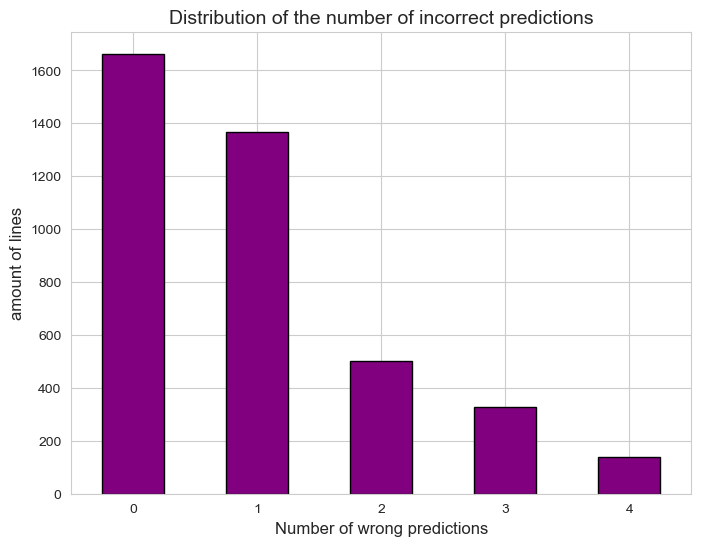

In [108]:
plt.figure(figsize=(8, 6))
merged_df['wrong_predictions_count'].value_counts().sort_index().plot(kind='bar', color='purple', edgecolor='black')

plt.title('Distribution of the number of incorrect predictions', fontsize=14)
plt.xlabel('Number of wrong predictions', fontsize=12)
plt.ylabel('amount of lines', fontsize=12)
plt.xticks(rotation=0)

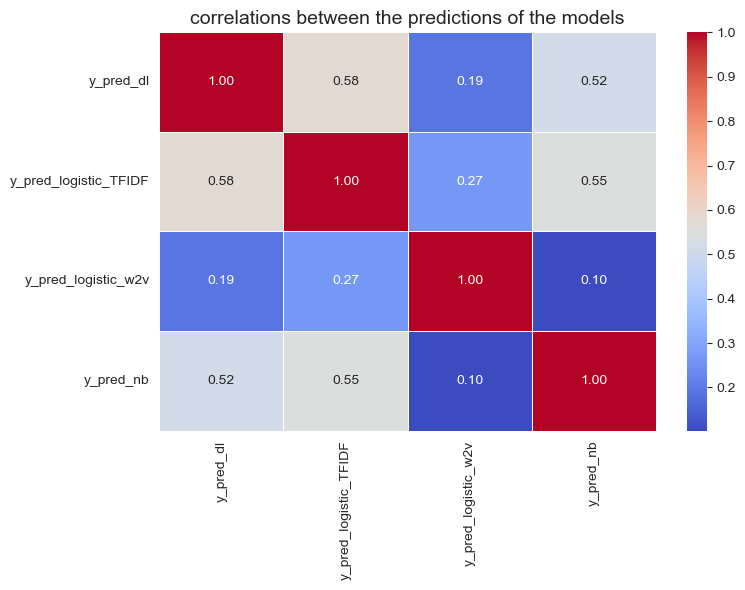

In [107]:
correlation_matrix = merged_df[['y_pred_dl', 'y_pred_logistic_TFIDF', 'y_pred_logistic_w2v', 'y_pred_nb']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlations between the predictions of the models', fontsize=14)
plt.tight_layout()
plt.show()

In [109]:

file_path = 'C:/Users/mayer/PycharmProjects/sexism_detection/data_submission/test_dataset.parquet'

test_dataset = pd.read_parquet(file_path)

print(test_dataset.head())


                                                text  label split  \
0  Fuck the niggers and the jews. Both have a his...      0  test   
1  Well then good because someone has to knock he...      1  test   
2  #USA #Texas #Islam #Muslims #Islamization #Sha...      0  test   
3  Yes, normal women want to be dominated. Social...      1  test   
4  She didn't have to be a bitch about it. She li...      1  test   

                                               lemma  \
0  b'["fuck","nigger","jews","both","have","histo...   
1  b'["well","good","someone","have","knock","her...   
2  b'["USA","Texas","Islam","Muslim","islamizatio...   
3  b'["yes","normal","woman","want","be","dominat...   
4  b'["she","do","not","have","be","bitch","it","...   

                                                 pos  user_count  url_count  
0  b'["VERB","NOUN","NOUN","DET","VERB","NOUN","V...           0          0  
1  b'["INTJ","ADJ","PRON","VERB","VERB","PRON","N...           0          0  
2  b'["PROPN",

In [110]:
test_dataset.shape

(4000, 7)

In [111]:
merged_df.shape

(4000, 10)

In [112]:
test_dataset_cleaned = test_dataset.drop(['label', 'split'], axis=1)

final_merged_df = test_dataset_cleaned.merge(merged_df, left_index=True, right_index=True)


In [113]:
print(final_merged_df.head())

                                                text  \
0  Fuck the niggers and the jews. Both have a his...   
1  Well then good because someone has to knock he...   
2  #USA #Texas #Islam #Muslims #Islamization #Sha...   
3  Yes, normal women want to be dominated. Social...   
4  She didn't have to be a bitch about it. She li...   

                                               lemma  \
0  b'["fuck","nigger","jews","both","have","histo...   
1  b'["well","good","someone","have","knock","her...   
2  b'["USA","Texas","Islam","Muslim","islamizatio...   
3  b'["yes","normal","woman","want","be","dominat...   
4  b'["she","do","not","have","be","bitch","it","...   

                                                 pos  user_count  url_count  \
0  b'["VERB","NOUN","NOUN","DET","VERB","NOUN","V...           0          0   
1  b'["INTJ","ADJ","PRON","VERB","VERB","PRON","N...           0          0   
2  b'["PROPN","PROPN","PROPN","PROPN","NOUN","PRO...           0          1   
3  b'["INT

In [114]:
wrong_predictions_4 = final_merged_df[final_merged_df['wrong_predictions_count'] == 4]

In [115]:
print(wrong_predictions_4.head())

                                                 text  \
11          I would pay to see her Ass Cracker. #nsfw   
18  Yes he can only top men fuck non ugly women no...   
49  I bet her future husband won't have anywhere n...   
53  I'm sure that kinder gentler baboon troop was ...   
71  What's the going timeframe onto getting on GAB...   

                                                lemma  \
11  b'["I","would","pay","see","her","Ass","Cracke...   
18  b'["yes","he","can","only","top","man","fuck",...   
49  b'["I","bet","her","future","husband","not","h...   
53  b'["I","be","sure","kind","gentler","baboon","...   
71  b'["be","go","timeframe","onto","get","GAB","n...   

                                                  pos  user_count  url_count  \
11  b'["PRON","AUX","VERB","VERB","PRON","PROPN","...           0          0   
18  b'["INTJ","PRON","AUX","ADV","VERB","NOUN","VE...           0          0   
49  b'["PRON","VERB","PRON","ADJ","NOUN","PART","V...           0         

In [117]:
wrong_predictions_4.to_csv('C:/Users/mayer/PycharmProjects/sexism_detection/data_submission/wrong_predictions_count_4.csv', index=False)

In [119]:
wrong_predictions_4_filtered = wrong_predictions_4[['text', 'label']]

wrong_predictions_4_filtered.to_csv('C:/Users/mayer/PycharmProjects/sexism_detection/data_submission/wrong_predictions_count_4_filtered.csv', index=False)
